In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)


# Load the data
data = pd.read_csv(r'Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


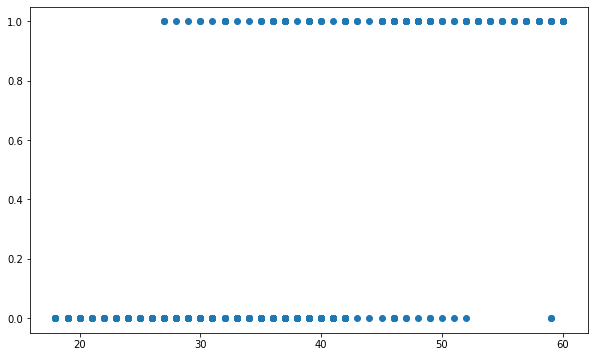

In [ ]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)

In [ ]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1




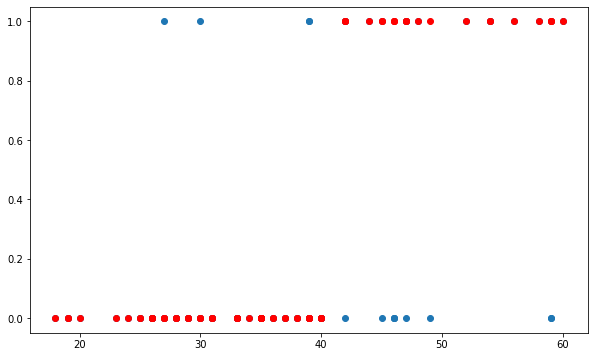

Accuracy = 0.8375


In [ ]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
#X_test = X_test.sort_values()  # Sorting values is optional only to see the line graph
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
# plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


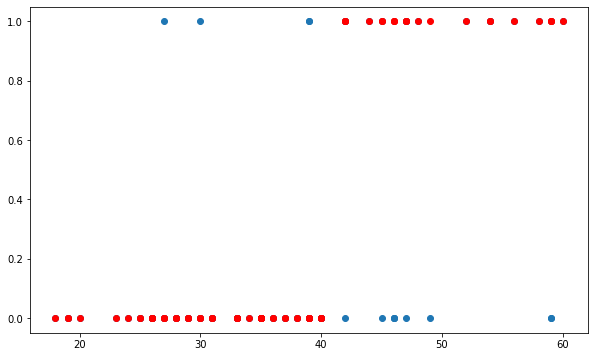

Accuracy = 0.8375


In [ ]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

In [ ]:
#Show Confusion Matrix, Accuracy and other metrics from above Data?

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
conf=confusion_matrix( y_test.values.reshape(-1, 1),y_pred)

Text(0.5, 1.0, 'Confusion matrix')

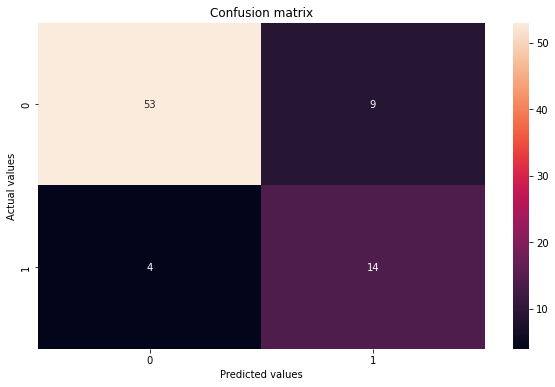

In [ ]:
conf_p=sns.heatmap(conf,annot=True)
conf_p.set_xlabel("Predicted values")
conf_p.set_ylabel("Actual values")
conf_p.set_title("Confusion matrix")

In [ ]:
tn, fp, fn, tp=confusion_matrix( y_test.values.reshape(-1, 1),y_pred).ravel()

In [ ]:
fpr=fp/(fp+tn)

In [ ]:
fpr

0.14516129032258066

In [ ]:
fnr=fn/(tp+fn)

In [ ]:
fnr

0.2222222222222222

In [ ]:
tnr=tn/(tn+fp)

In [ ]:
tnr

0.8548387096774194

In [ ]:
tpr=tp/(tp+fn)

In [ ]:
tpr

0.7777777777777778

In [ ]:
pr=tp/(tp+fp)

In [ ]:
pr

0.6086956521739131

In [ ]:
acc= (tp+tn)/(tp+fp+tn+fn)

In [ ]:
acc

0.8375

In [ ]:
f1=(pr*tpr)/(pr+tpr)

In [ ]:
f1

0.34146341463414637

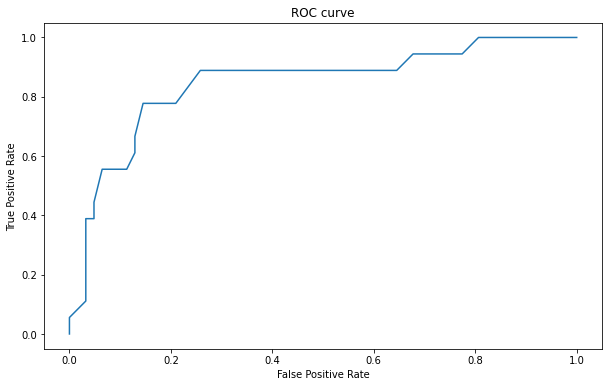

In [ ]:
from sklearn import metrics
y_pred_proba = lr_model.predict_proba(X_test.values.reshape(-1, 1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()